С помощью векторных представлений слов

Используем векторные представления Word2Vec.

In [188]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import f1_score, accuracy_score
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier

In [189]:
emoji_dict = {"0":"smile positive/negative", "1":"no_emotion neutral/skeptical", "2":"joy positive",
              "3":"no_emotion positive/negative", "4":"sadness negative", "5":"fear negative",
              "6":"shame negative","7":"anger negative", "8":"disgust negative",
              "9":"surprise positive/negative","10":"disgust neutral/skeptical", "11":"surprise negative",
              "12":"no_emotion negative","13":"sadness positive/negative", "14":"fear positive/negative"}

In [190]:
emoji_dict["7"]

'anger negative'

## Загружаем и готовим набор данных

In [2]:
df_em_1_token_10 = pd.read_csv('df_em_1_token_10.csv', sep=";")

In [4]:
df_em_1_token_10

,img_emoji,word_count,count_emoji,emotion,tonality,class,clean_text
0,😂,5,1,smile,positive/negative,0,почему бы и нет 😂
1,😁,5,1,smile,positive/negative,0,как сесть на диету 😁
2,😁,6,1,smile,positive/negative,0,когда в душе ещё щенок 😁
3,😻,6,1,joy,positive,2,новые фотографии нюши просто огненные😻
4,😍,7,1,joy,positive,2,безумно красивая актриса - алина ланина 😍
...,...,...,...,...,...,...,...
9215,😄,5,1,smile,positive/negative,0,ряды эскортниц скоро пополнится 😄
9216,😂,7,1,smile,positive/negative,0,так он прав ты реально даун 😂
9217,🤔,7,1,no_emotion,neutral/skeptical,1,вы же не про меня?🤔
9218,🤔,9,1,no_emotion,neutral/skeptical,1,про кого пошутил то это не до комик🤔


In [5]:
df_em_1_token_10.sort_values(by='word_count', ascending=False)

,img_emoji,word_count,count_emoji,emotion,tonality,class,clean_text
5203,😁,11,1,smile,positive/negative,0,"я пользуюсь, но не смотрю.. смотрю мультики и ..."
8441,🤔,11,1,no_emotion,neutral/skeptical,1,так бывает дружба между мужчиной и женщиной ил...
8084,🤣,11,1,smile,positive/negative,0,зачем вам девушка? вам и с голубем не плохо 🤣
8081,😁,11,1,smile,positive/negative,0,ну девок много а я у мамы один такой прекрасный 😁
5467,😁,11,1,smile,positive/negative,0,это когда резко приуныл а тут и страхов очка е...
...,...,...,...,...,...,...,...
7141,😃,2,1,smile,positive/negative,0,круто😃
5010,😉,2,1,smile,positive/negative,0,ага😉
8606,🙂,2,1,smile,positive/negative,0,батя🙂
7126,😂,2,1,smile,positive/negative,0,фотошоп😂


In [7]:
df_em_1_token_10.groupby('word_count').count()

,img_emoji,count_emoji,emotion,tonality,class,clean_text
word_count,,,,,,
2,551,551,551,551,551,551
3,942,942,942,942,942,942
4,1076,1076,1076,1076,1076,1076
5,1127,1127,1127,1127,1127,1127
6,1216,1216,1216,1216,1216,1216
7,1089,1089,1089,1089,1089,1089
8,986,986,986,986,986,986
9,879,879,879,879,879,879
10,749,749,749,749,749,749


In [8]:
#берём текст как есть с пунктуацией и с эмодзи
def preprocess(text):
    tokens = text.lower().split()
    preprocessed_text = []
    for token in tokens:
        preprocessed_text.append(token)
    return preprocessed_text

In [106]:
import re

In [107]:
#без пунктуации и эмодзи
def preprocess_no_punct(text):
    no_punct_text = re.sub(r'[^\w\s]', ' ', text)
    tokens = no_punct_text.lower().split()
    preprocessed_text = []
    for token in tokens:
        preprocessed_text.append(token)
    return preprocessed_text

In [195]:
import pymorphy2

In [196]:
morph = pymorphy2.MorphAnalyzer()

In [197]:
#леммы без пунктуации и эмодзи
def preprocess_lemma(text):
    no_punct_text = re.sub(r'[^\w\s]', ' ', text)
    tokens = no_punct_text.lower().split()
    preprocessed_text = []
    for token in tokens:
        lemma = morph.parse(token)[0].normal_form
        preprocessed_text.append(lemma)
    return preprocessed_text

In [198]:
#леммы c пунктуацией и эмодзи
def preprocess_lemma_em(text):
    tokens = text.lower().split()
    preprocessed_text = []
    for token in tokens:
        lemma = morph.parse(token)[0].normal_form
        preprocessed_text.append(lemma)
    return preprocessed_text

In [108]:
#df_em_1_token_10['Preprocessed_texts'] = df_em_1_token_10.apply(lambda row: preprocess(row['clean_text']), axis=1)

In [199]:
#df_em_1_token_10['Preprocessed_texts_no_punct'] = df_em_1_token_10.apply(lambda row: preprocess_no_punct(row['clean_text']), axis=1)

In [200]:
df_em_1_token_10['Preprocessed_texts_lemma'] = df_em_1_token_10.apply(lambda row: preprocess_lemma_em(row['clean_text']), axis=1)

## Обучение Word2Vec

In [202]:
import gensim.models

In [11]:
#max_len = 100
max_len = 11
vector_size = 300
random_state = 42
min_count=1
window=6

In [204]:
model_w2v = gensim.models.Word2Vec(sentences=df_em_1_token_10['Preprocessed_texts_lemma'], 
                               min_count=min_count, window=window,   
                               vector_size=vector_size)

In [205]:
model_w2v.wv['хороший']

array([ 0.02535142,  0.1553747 ,  0.00968606,  0.04186791, -0.00652961,
       -0.12673174,  0.17519505,  0.34709835, -0.01442898, -0.01423981,
        0.01370811, -0.10515824, -0.02171152,  0.04533768, -0.0961304 ,
       -0.1382911 ,  0.1447441 , -0.0146808 ,  0.04765222, -0.08074608,
       -0.0768189 , -0.06778786,  0.168393  ,  0.01557644,  0.09241117,
       -0.00737767, -0.15802087, -0.00910841, -0.13286199, -0.16504113,
        0.04461129, -0.05818423,  0.0435673 , -0.0268141 , -0.07594834,
        0.09736775,  0.07111402, -0.13819708, -0.02048261, -0.02027693,
       -0.08554538, -0.02739865,  0.00631197, -0.12207931,  0.11319287,
        0.19062173,  0.01707893,  0.09786728, -0.05756278,  0.15062961,
        0.05809838,  0.06538974, -0.06156971,  0.04275304, -0.01671481,
        0.15696505,  0.01537583,  0.02221011,  0.01437383,  0.01827412,
       -0.12253622, -0.09065044, -0.07116699,  0.08132894, -0.07477158,
        0.09928771,  0.05427288,  0.06921217, -0.11440931, -0.03

In [206]:
model_w2v.wv.most_similar('хороший')

[('в', 0.9998053312301636),
 ('не', 0.9997916221618652),
 ('на', 0.9997889995574951),
 ('из', 0.9997850656509399),
 ('и', 0.9997811913490295),
 ('для', 0.9997767210006714),
 ('с', 0.9997734427452087),
 ('что', 0.9997701048851013),
 ('по', 0.9997652173042297),
 ('как', 0.9997636675834656)]

In [207]:
model_w2v.wv.most_similar('радоваться')

[('фото', 0.9788702726364136),
 ('😳', 0.9788094162940979),
 ('чтобы', 0.9787051677703857),
 ('без', 0.9786741137504578),
 ('один', 0.9786697030067444),
 ('какой', 0.978641927242279),
 ('как', 0.9786359071731567),
 ('чем', 0.9786145687103271),
 ('уже', 0.9786067008972168),
 ('потом', 0.9786037802696228)]

Находим плотные векторные представления для всех слов в тексте

In [208]:
preprocessed_text = df_em_1_token_10['Preprocessed_texts_lemma'][0]
preprocessed_text

['почему', 'бы', 'и', 'нет', '😂']

## Векторизуем текст

Функция для векторизации текста

In [209]:
import numpy as np

In [210]:
zero_vec = np.zeros(vector_size, dtype=float)
zero_vec

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [211]:
def vectorize_text(txt, model_w2v, max_len):
    text_embeddings = []
    for token in txt:
        try:
            embedding = model_w2v.wv[token]
            text_embeddings.append(embedding)
        except:
            print("токена " + token + " нет в модели")
    # Дополняем или обрезаем текст для фиксированной длины max_len 
    l = len(text_embeddings)
    if l > max_len:
        text_embeddings = text_embeddings[:max_len]
    else:
        text_embeddings.extend([zero_vec] * (max_len - l)) 
    return text_embeddings

Применяем функцию векторизации текста

In [123]:
#df_em_1_token_10['Embeddings'] = df_em_1_token_10.apply(lambda row: vectorize_text(row['Preprocessed_texts'], model_w2v, max_len), axis=1)

In [212]:
#df_em_1_token_10['Embeddings'] = df_em_1_token_10.apply(lambda row: vectorize_text(row['Preprocessed_texts_no_punct'], model_w2v, max_len), axis=1)

In [213]:
df_em_1_token_10['Embeddings'] = df_em_1_token_10.apply(lambda row: vectorize_text(row['Preprocessed_texts_lemma'], model_w2v, max_len), axis=1)

## Готовим данные для обучения

### Выделяем данные для обучения и тестирования

In [12]:
train, test = train_test_split(df_em_1_token_10, test_size=0.2, random_state = random_state)

In [218]:
len(train)+len(test)

9220

### Разделяем метки классов и данные для обучения

Данные для обучения

In [219]:
import numpy as np

In [220]:
x_train = np.array(train['Embeddings'].tolist()).reshape(len(train), vector_size * max_len)
y_train = train['class']

In [221]:
x_train.shape

(7376, 3300)

In [222]:
y_train

5559    0
8376    0
5562    0
1491    0
6375    1
       ..
5734    0
5191    0
5390    4
860     9
7270    0
Name: class, Length: 7376, dtype: int64

Данные для тестирования

In [223]:
x_test = np.array(test['Embeddings'].tolist()).reshape(len(test), vector_size * max_len)
y_test = test['class']

In [224]:
x_test.shape

(1844, 3300)

In [225]:
y_test

7810    0
1180    0
5865    2
623     0
711     5
       ..
4401    0
7481    0
4467    4
4539    0
1323    2
Name: class, Length: 1844, dtype: int64

## Создаем модели машинного обучения

In [226]:
def train_test(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc = accuracy_score(y_test, clf.predict(X_test))
    f1_macro = f1_score(y_test, clf.predict(X_test), average='macro')
    f1_micro = f1_score(y_test, clf.predict(X_test), average='micro')
    f1_weighted = f1_score(y_test, clf.predict(X_test), average='weighted')
    return train_acc, test_acc, f1_macro, f1_micro, f1_weighted

In [227]:
lr = LogisticRegression(random_state=random_state, max_iter=500)
svc = SVC(probability=True)
rforest = RandomForestClassifier(random_state=random_state)
dtree = DecisionTreeClassifier()
nb = GaussianNB()
gb = GradientBoostingClassifier(random_state=random_state)

In [228]:
clifs = [lr, svc, rforest, dtree, nb, gb]

# Ансамблевые методы

## Мажоритарное голосование

In [229]:
from sklearn.ensemble import VotingClassifier

In [230]:
eclf_hard = VotingClassifier(estimators=[('lr', lr), ('svc', svc), ('rforest', rforest), ('dtree', dtree), ('nb', nb), ('gb', gb)], voting='hard')

In [231]:
eclf_hard.fit(x_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=500,
                                                 random_state=42)),
                             ('svc', SVC(probability=True)),
                             ('rforest',
                              RandomForestClassifier(random_state=42)),
                             ('dtree', DecisionTreeClassifier()),
                             ('nb', GaussianNB()),
                             ('gb',
                              GradientBoostingClassifier(random_state=42))])

In [232]:
predicted = eclf_hard.predict(x_test)

In [44]:
#Preprocessed_texts

In [45]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79      1166
           1       1.00      0.11      0.20       203
           2       1.00      0.09      0.16       152
           3       1.00      0.07      0.13       101
           4       0.67      0.02      0.04        86
           5       0.00      0.00      0.00        26
           6       1.00      0.08      0.15        24
           7       0.00      0.00      0.00        15
           8       0.00      0.00      0.00        14
           9       1.00      0.17      0.29        18
          10       0.00      0.00      0.00         8
          11       0.00      0.00      0.00        15
          12       0.00      0.00      0.00        11
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         2

    accuracy                           0.66      1844
   macro avg       0.42      0.10      0.12      1844
weighted avg       0.71   

/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
import matplotlib.pyplot as plt

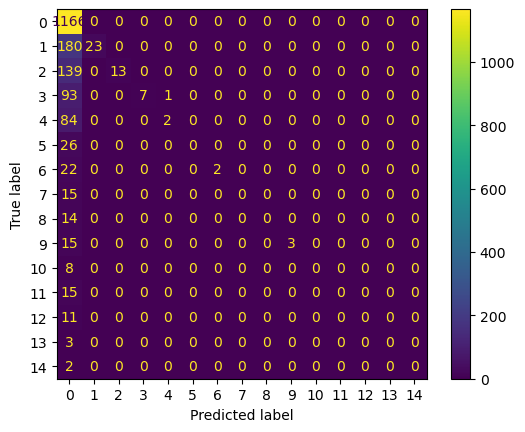

In [47]:
confusion_matrix = metrics.confusion_matrix(y_test, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["0", "1", "2", "3", "4","5","6","7","8","9","10","11","12","13","14"])

cm_display.plot()
plt.show()

In [48]:
def scores(clf, X_train, X_test, y_train, y_test):
    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc = accuracy_score(y_test, clf.predict(X_test))
    f1_macro = f1_score(y_test, clf.predict(X_test), average='macro')
    f1_micro = f1_score(y_test, clf.predict(X_test), average='micro')
    f1_weighted = f1_score(y_test, clf.predict(X_test), average='weighted')
    return train_acc, test_acc, f1_macro, f1_micro, f1_weighted

In [49]:
print("| {:25} | {} | {} | {} | {} | {} |".format("Classifier", "Training Accuracy", "Test Accuracy", "F1_macro", "F1_micro", "F1_weighted"))
print("| {} | {} | {} | {} | {} | {} |".format("-"*25, "-"*17, "-"*13, "-"*8, "-"*8, "-"*11))
clf_name = eclf_hard.__class__.__name__
train_acc, test_acc, f1_macro, f1_micro, f1_weighted  = scores(eclf_hard, x_train, x_test, y_train, y_test)
print("| {:25} | {:17.7f} | {:13.7f} | {:8.7f} | {:8.7f} | {:11.7f} |".format(clf_name, train_acc, test_acc, f1_macro, f1_micro, f1_weighted))

| Classifier                | Training Accuracy | Test Accuracy | F1_macro | F1_micro | F1_weighted |
| ------------------------- | ----------------- | ------------- | -------- | -------- | ----------- |
| VotingClassifier          |         0.8120933 |     0.6594360 | 0.1175569 | 0.6594360 |   0.5477182 |


In [144]:
#Preprocessed_texts_no_punct

In [145]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1166
           1       1.00      0.00      0.01       203
           2       1.00      0.05      0.09       152
           3       1.00      0.01      0.02       101
           4       1.00      0.01      0.02        86
           5       0.00      0.00      0.00        26
           6       0.67      0.08      0.15        24
           7       0.00      0.00      0.00        15
           8       0.00      0.00      0.00        14
           9       0.50      0.17      0.25        18
          10       0.00      0.00      0.00         8
          11       0.00      0.00      0.00        15
          12       0.00      0.00      0.00        11
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         2

    accuracy                           0.64      1844
   macro avg       0.39      0.09      0.09      1844
weighted avg       0.71   

/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


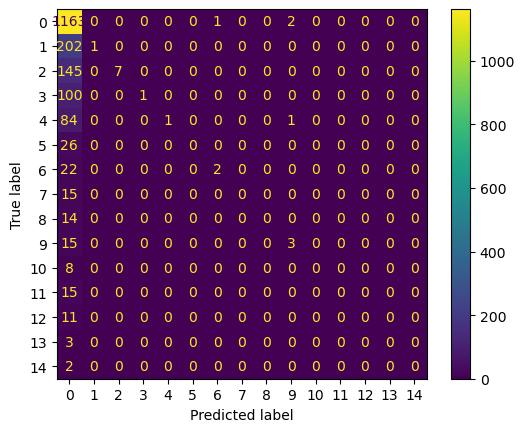

In [146]:
confusion_matrix = metrics.confusion_matrix(y_test, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["0", "1", "2", "3", "4","5","6","7","8","9","10","11","12","13","14"])

cm_display.plot()
plt.show()

In [147]:
print("| {:25} | {} | {} | {} | {} | {} |".format("Classifier", "Training Accuracy", "Test Accuracy", "F1_macro", "F1_micro", "F1_weighted"))
print("| {} | {} | {} | {} | {} | {} |".format("-"*25, "-"*17, "-"*13, "-"*8, "-"*8, "-"*11))
clf_name = eclf_hard.__class__.__name__
train_acc, test_acc, f1_macro, f1_micro, f1_weighted  = scores(eclf_hard, x_train, x_test, y_train, y_test)
print("| {:25} | {:17.7f} | {:13.7f} | {:8.7f} | {:8.7f} | {:11.7f} |".format(clf_name, train_acc, test_acc, f1_macro, f1_micro, f1_weighted))

| Classifier                | Training Accuracy | Test Accuracy | F1_macro | F1_micro | F1_weighted |
| ------------------------- | ----------------- | ------------- | -------- | -------- | ----------- |
| VotingClassifier          |         0.7720987 |     0.6388286 | 0.0877510 | 0.6388286 |   0.5065866 |


In [236]:
#Preprocessed_texts_lemma_em

In [237]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79      1166
           1       1.00      0.13      0.23       203
           2       1.00      0.11      0.19       152
           3       1.00      0.05      0.09       101
           4       1.00      0.01      0.02        86
           5       0.00      0.00      0.00        26
           6       1.00      0.12      0.22        24
           7       0.00      0.00      0.00        15
           8       1.00      0.14      0.25        14
           9       1.00      0.17      0.29        18
          10       0.00      0.00      0.00         8
          11       0.00      0.00      0.00        15
          12       0.00      0.00      0.00        11
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         2

    accuracy                           0.66      1844
   macro avg       0.51      0.12      0.14      1844
weighted avg       0.74   

/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


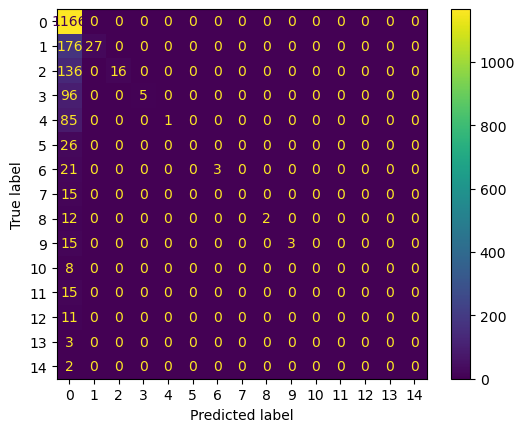

In [238]:
confusion_matrix = metrics.confusion_matrix(y_test, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["0", "1", "2", "3", "4","5","6","7","8","9","10","11","12","13","14"])

cm_display.plot()
plt.show()

In [239]:
print("| {:25} | {} | {} | {} | {} | {} |".format("Classifier", "Training Accuracy", "Test Accuracy", "F1_macro", "F1_micro", "F1_weighted"))
print("| {} | {} | {} | {} | {} | {} |".format("-"*25, "-"*17, "-"*13, "-"*8, "-"*8, "-"*11))
clf_name = eclf_hard.__class__.__name__
train_acc, test_acc, f1_macro, f1_micro, f1_weighted  = scores(eclf_hard, x_train, x_test, y_train, y_test)
print("| {:25} | {:17.7f} | {:13.7f} | {:8.7f} | {:8.7f} | {:11.7f} |".format(clf_name, train_acc, test_acc, f1_macro, f1_micro, f1_weighted))

| Classifier                | Training Accuracy | Test Accuracy | F1_macro | F1_micro | F1_weighted |
| ------------------------- | ----------------- | ------------- | -------- | -------- | ----------- |
| VotingClassifier          |         0.8168384 |     0.6632321 | 0.1393486 | 0.6632321 |   0.5547132 |


## Мягкое голосование

In [240]:
eclf_soft = VotingClassifier(estimators=[('lr', lr), ('svc', svc), ('rforest', rforest), ('dtree', dtree), ('nb', nb), ('gb', gb)], voting='soft')

In [241]:
eclf_soft.fit(x_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=500,
                                                 random_state=42)),
                             ('svc', SVC(probability=True)),
                             ('rforest',
                              RandomForestClassifier(random_state=42)),
                             ('dtree', DecisionTreeClassifier()),
                             ('nb', GaussianNB()),
                             ('gb',
                              GradientBoostingClassifier(random_state=42))],
                 voting='soft')

In [242]:
predicted = eclf_soft.predict(x_test)

In [53]:
#Preprocessed_texts

In [54]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.66      1.00      0.79      1166
           1       1.00      0.18      0.31       203
           2       1.00      0.14      0.24       152
           3       1.00      0.07      0.13       101
           4       0.75      0.03      0.07        86
           5       0.00      0.00      0.00        26
           6       1.00      0.08      0.15        24
           7       0.00      0.00      0.00        15
           8       0.00      0.00      0.00        14
           9       1.00      0.17      0.29        18
          10       0.00      0.00      0.00         8
          11       0.00      0.00      0.00        15
          12       0.00      0.00      0.00        11
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         2

    accuracy                           0.67      1844
   macro avg       0.43      0.11      0.13      1844
weighted avg       0.72   

/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


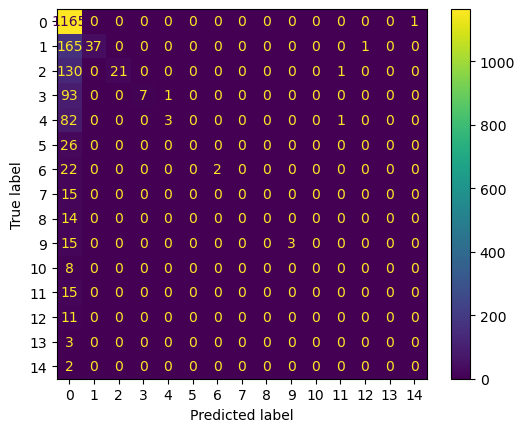

In [55]:
confusion_matrix = metrics.confusion_matrix(y_test, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["0", "1", "2", "3", "4","5","6","7","8","9","10","11","12","13","14"])

cm_display.plot()
plt.show()

In [56]:
print("| {:25} | {} | {} | {} | {} | {} |".format("Classifier", "Training Accuracy", "Test Accuracy", "F1_macro", "F1_micro", "F1_weighted"))
print("| {} | {} | {} | {} | {} | {} |".format("-"*25, "-"*17, "-"*13, "-"*8, "-"*8, "-"*11))
clf_name = eclf_soft.__class__.__name__
train_acc, test_acc, f1_macro, f1_micro, f1_weighted  = scores(eclf_soft, x_train, x_test, y_train, y_test)
print("| {:25} | {:17.7f} | {:13.7f} | {:8.7f} | {:8.7f} | {:11.7f} |".format(clf_name, train_acc, test_acc, f1_macro, f1_micro, f1_weighted))

| Classifier                | Training Accuracy | Test Accuracy | F1_macro | F1_micro | F1_weighted |
| ------------------------- | ----------------- | ------------- | -------- | -------- | ----------- |
| VotingClassifier          |         0.9185195 |     0.6713666 | 0.1321096 | 0.6713666 |   0.5714483 |


In [151]:
#Preprocessed_texts_no_punct

In [152]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.64      0.99      0.78      1166
           1       1.00      0.00      0.01       203
           2       0.75      0.06      0.11       152
           3       0.50      0.01      0.02       101
           4       0.33      0.01      0.02        86
           5       0.00      0.00      0.00        26
           6       0.67      0.08      0.15        24
           7       0.00      0.00      0.00        15
           8       0.00      0.00      0.00        14
           9       0.50      0.17      0.25        18
          10       0.00      0.00      0.00         8
          11       0.00      0.00      0.00        15
          12       0.00      0.00      0.00        11
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         2

    accuracy                           0.64      1844
   macro avg       0.29      0.09      0.09      1844
weighted avg       0.63   

/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


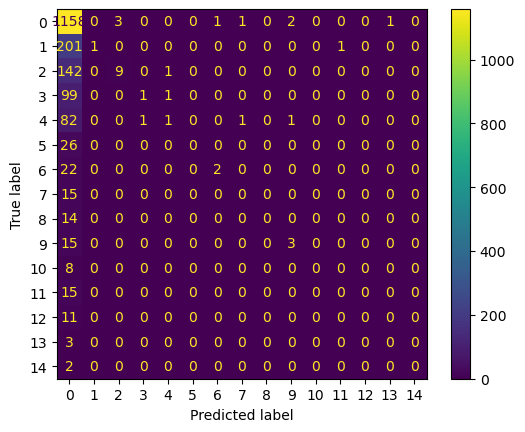

In [153]:
confusion_matrix = metrics.confusion_matrix(y_test, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["0", "1", "2", "3", "4","5","6","7","8","9","10","11","12","13","14"])

cm_display.plot()
plt.show()

In [154]:
print("| {:25} | {} | {} | {} | {} | {} |".format("Classifier", "Training Accuracy", "Test Accuracy", "F1_macro", "F1_micro", "F1_weighted"))
print("| {} | {} | {} | {} | {} | {} |".format("-"*25, "-"*17, "-"*13, "-"*8, "-"*8, "-"*11))
clf_name = eclf_soft.__class__.__name__
train_acc, test_acc, f1_macro, f1_micro, f1_weighted  = scores(eclf_soft, x_train, x_test, y_train, y_test)
print("| {:25} | {:17.7f} | {:13.7f} | {:8.7f} | {:8.7f} | {:11.7f} |".format(clf_name, train_acc, test_acc, f1_macro, f1_micro, f1_weighted))

| Classifier                | Training Accuracy | Test Accuracy | F1_macro | F1_micro | F1_weighted |
| ------------------------- | ----------------- | ------------- | -------- | -------- | ----------- |
| VotingClassifier          |         0.8565618 |     0.6372017 | 0.0891360 | 0.6372017 |   0.5081995 |


In [243]:
#Preprocessed_texts_lemma_em

In [244]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80      1166
           1       1.00      0.21      0.34       203
           2       1.00      0.21      0.35       152
           3       1.00      0.10      0.18       101
           4       0.80      0.05      0.09        86
           5       0.00      0.00      0.00        26
           6       1.00      0.12      0.22        24
           7       0.50      0.07      0.12        15
           8       1.00      0.14      0.25        14
           9       1.00      0.22      0.36        18
          10       0.00      0.00      0.00         8
          11       0.00      0.00      0.00        15
          12       0.00      0.00      0.00        11
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         2

    accuracy                           0.68      1844
   macro avg       0.53      0.14      0.18      1844
weighted avg       0.74   

/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


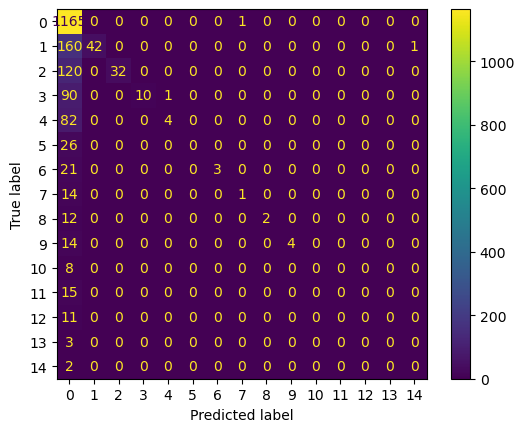

In [245]:
confusion_matrix = metrics.confusion_matrix(y_test, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["0", "1", "2", "3", "4","5","6","7","8","9","10","11","12","13","14"])

cm_display.plot()
plt.show()

In [246]:
print("| {:25} | {} | {} | {} | {} | {} |".format("Classifier", "Training Accuracy", "Test Accuracy", "F1_macro", "F1_micro", "F1_weighted"))
print("| {} | {} | {} | {} | {} | {} |".format("-"*25, "-"*17, "-"*13, "-"*8, "-"*8, "-"*11))
clf_name = eclf_soft.__class__.__name__
train_acc, test_acc, f1_macro, f1_micro, f1_weighted  = scores(eclf_soft, x_train, x_test, y_train, y_test)
print("| {:25} | {:17.7f} | {:13.7f} | {:8.7f} | {:8.7f} | {:11.7f} |".format(clf_name, train_acc, test_acc, f1_macro, f1_micro, f1_weighted))

| Classifier                | Training Accuracy | Test Accuracy | F1_macro | F1_micro | F1_weighted |
| ------------------------- | ----------------- | ------------- | -------- | -------- | ----------- |
| VotingClassifier          |         0.9149946 |     0.6849241 | 0.1808829 | 0.6849241 |   0.5961464 |


## Обучаем модели машинного обучения

In [58]:
#Preprocessed_texts

In [59]:
# train and test them 
print("| {:25} | {} | {} | {} | {} | {} |".format("Classifier", "Training Accuracy", "Test Accuracy", "F1_macro", "F1_micro", "F1_weighted"))
print("| {} | {} | {} | {} | {} | {} |".format("-"*25, "-"*17, "-"*13, "-"*8, "-"*8, "-"*11))
for clf in clifs: 
    clf_name = clf.__class__.__name__
    train_acc, test_acc, f1_macro, f1_micro, f1_weighted  = train_test(clf, x_train, x_test, y_train, y_test)
    print("| {:25} | {:17.7f} | {:13.7f} | {:8.7f} | {:8.7f} | {:11.7f} |".format(clf_name, train_acc, test_acc, f1_macro, f1_micro, f1_weighted))

| Classifier                | Training Accuracy | Test Accuracy | F1_macro | F1_micro | F1_weighted |
| ------------------------- | ----------------- | ------------- | -------- | -------- | ----------- |
| LogisticRegression        |         0.6491323 |     0.6323210 | 0.0516501 | 0.6323210 |   0.4898913 |
| SVC                       |         0.6491323 |     0.6323210 | 0.0516501 | 0.6323210 |   0.4898913 |
| RandomForestClassifier    |         1.0000000 |     0.7017354 | 0.2363892 | 0.7017354 |   0.6252998 |
| DecisionTreeClassifier    |         1.0000000 |     0.5428416 | 0.1522052 | 0.5428416 |   0.5453834 |
| GaussianNB                |         0.0390456 |     0.0439262 | 0.0162614 | 0.0439262 |   0.0759571 |
| GradientBoostingClassifier |         0.8233460 |     0.6344902 | 0.1554569 | 0.6344902 |   0.5724077 |


In [156]:
#Preprocessed_texts_no_punct

In [157]:
print("| {:25} | {} | {} | {} | {} | {} |".format("Classifier", "Training Accuracy", "Test Accuracy", "F1_macro", "F1_micro", "F1_weighted"))
print("| {} | {} | {} | {} | {} | {} |".format("-"*25, "-"*17, "-"*13, "-"*8, "-"*8, "-"*11))
for clf in clifs: 
    clf_name = clf.__class__.__name__
    train_acc, test_acc, f1_macro, f1_micro, f1_weighted  = train_test(clf, x_train, x_test, y_train, y_test)
    print("| {:25} | {:17.7f} | {:13.7f} | {:8.7f} | {:8.7f} | {:11.7f} |".format(clf_name, train_acc, test_acc, f1_macro, f1_micro, f1_weighted))

| Classifier                | Training Accuracy | Test Accuracy | F1_macro | F1_micro | F1_weighted |
| ------------------------- | ----------------- | ------------- | -------- | -------- | ----------- |
| LogisticRegression        |         0.6491323 |     0.6323210 | 0.0516501 | 0.6323210 |   0.4898913 |
| SVC                       |         0.6491323 |     0.6323210 | 0.0516501 | 0.6323210 |   0.4898913 |
| RandomForestClassifier    |         0.9890184 |     0.6409978 | 0.0971264 | 0.6409978 |   0.5173865 |
| DecisionTreeClassifier    |         0.9890184 |     0.4587852 | 0.0983083 | 0.4587852 |   0.4548319 |
| GaussianNB                |         0.0043384 |     0.0027115 | 0.0025161 | 0.0027115 |   0.0011717 |
| GradientBoostingClassifier |         0.7716920 |     0.5889371 | 0.0857907 | 0.5889371 |   0.4909355 |


In [248]:
#Preprocessed_texts_lemma

In [249]:
print("| {:25} | {} | {} | {} | {} | {} |".format("Classifier", "Training Accuracy", "Test Accuracy", "F1_macro", "F1_micro", "F1_weighted"))
print("| {} | {} | {} | {} | {} | {} |".format("-"*25, "-"*17, "-"*13, "-"*8, "-"*8, "-"*11))
for clf in clifs: 
    clf_name = clf.__class__.__name__
    train_acc, test_acc, f1_macro, f1_micro, f1_weighted  = train_test(clf, x_train, x_test, y_train, y_test)
    print("| {:25} | {:17.7f} | {:13.7f} | {:8.7f} | {:8.7f} | {:11.7f} |".format(clf_name, train_acc, test_acc, f1_macro, f1_micro, f1_weighted))

| Classifier                | Training Accuracy | Test Accuracy | F1_macro | F1_micro | F1_weighted |
| ------------------------- | ----------------- | ------------- | -------- | -------- | ----------- |
| LogisticRegression        |         0.6491323 |     0.6323210 | 0.0516501 | 0.6323210 |   0.4898913 |
| SVC                       |         0.6491323 |     0.6323210 | 0.0516501 | 0.6323210 |   0.4898913 |
| RandomForestClassifier    |         1.0000000 |     0.7114967 | 0.2584813 | 0.7114967 |   0.6419404 |
| DecisionTreeClassifier    |         1.0000000 |     0.5547722 | 0.1890566 | 0.5547722 |   0.5578872 |
| GaussianNB                |         0.0300976 |     0.0379610 | 0.0140221 | 0.0379610 |   0.0655967 |
| GradientBoostingClassifier |         0.8268709 |     0.6355748 | 0.1876753 | 0.6355748 |   0.5697070 |


## Оцениваем качество обучения на тестовом наборе данных

Определяем долю правильных ответов (accuracy) на тестовом наборе данных

In [250]:
#Preprocessed_texts_lemma_em

In [254]:
# max_len = 11 df_em_1_token_10 9220 записей c clean_text
# min_count=1
# window = 6
# 0.6637744034707158 на тексте как есть с пунктуацией и с эмодзи
# 0.6339479392624728 на тексте без пунктуации и без эмодзи
# 0.6540130151843818 лемматизированный текст с пунктуацией и с эмодзи

In [255]:
# df_em_1_token_10 9220 записей c clean_text
# на тексте как есть с пунктуацией и с эмодзи

# f1_score macro  = 0.05699385360402309
# f1_score micro = 0.6637744034707158
# f1_score weighted = 0.5296348564851083
# f1_score average=None 
# array([0.79791395, 0.        , 0.        , 0.        , 0.        ,
 #      0.        , 0.        , 0.        , 0.        , 0.        ,
  #     0.        , 0.        , 0.        , 0.        ])

# на тексте без пунктуации и без эмодзи
# f1_score macro  = 0.055426485230667115
# f1_score micro = 0.6339479392624728
# f1_score weighted = 0.4919250852956063
# f1_score average = None 
# array([0.77597079, 0.        , 0.        , 0.        , 0.        ,
 #      0.        , 0.        , 0.        , 0.        , 0.        ,
  #     0.        , 0.        , 0.        , 0.        ])

# лемматизированный текст c пунктуацией и с эмодзи
# f1_score macro  = 0.05272131147540984
# f1_score micro = 0.6540130151843818
# f1_score weighted = 0.5172063582376161
# f1_score average = None 
# array([0.79081967, 0.        , 0.        , 0.        , 0.        ,
 #      0.        , 0.        , 0.        , 0.        , 0.        ,
  #     0.        , 0.        , 0.        , 0.        , 0.        ])

## Применяем модель

In [256]:
#text = "Хех и сразу музыка в голове"
#text = "я даже неделю не могу продержаться 😭"
text = "жизнь прекрасна !"

Подготовка текста к обработке

In [257]:
#preprocessed_text = preprocess(text)
#preprocessed_text = preprocess_no_punct(text)
preprocessed_text = preprocess_lemma_em(text)

In [258]:
preprocessed_text

['жизнь', 'прекрасный', '!']

In [259]:
vectorized_text = vectorize_text(preprocessed_text, model_w2v, max_len)

In [260]:
vectorized_text

[array([ 1.14547210e-02,  6.91533238e-02,  2.78973277e-03,  2.21528579e-02,
        -3.78175802e-03, -5.76328523e-02,  7.33373091e-02,  1.48671225e-01,
        -5.16939582e-03, -5.82108693e-03,  4.85827355e-03, -4.44633551e-02,
        -1.13316635e-02,  2.11288091e-02, -4.06053811e-02, -6.06872886e-02,
         6.50048479e-02, -7.43905874e-03,  1.91181917e-02, -3.22612375e-02,
        -3.16866487e-02, -2.85133999e-02,  7.74785727e-02,  8.69547576e-03,
         4.21142727e-02, -2.52081337e-03, -6.57079220e-02, -4.24540311e-04,
        -5.63480482e-02, -7.30928779e-02,  1.87424254e-02, -2.70033795e-02,
         2.22851224e-02, -1.12881977e-02, -3.45857032e-02,  4.28995639e-02,
         3.35660614e-02, -6.05557971e-02, -8.82228557e-03, -7.30996858e-03,
        -3.78674269e-02, -1.18532963e-02,  1.13532669e-03, -5.31191677e-02,
         4.76716124e-02,  7.94570446e-02,  7.24665215e-03,  4.08094265e-02,
        -2.57066023e-02,  6.61643147e-02,  2.68008448e-02,  2.60595232e-02,
        -2.8

In [261]:
_vector = np.array(vectorized_text).reshape(1, vector_size * max_len)

In [262]:
_vector.shape

(1, 3300)

Выполняем распознавание

In [263]:
# Мажоритарное голосование

In [264]:
result = eclf_hard.predict(_vector)

In [265]:
result, emoji_dict[str(result[0])]

(array([0]), 'smile positive/negative')

In [266]:
# Мягкое голосование

In [267]:
result = eclf_soft.predict(_vector)

In [268]:
result, emoji_dict[str(result[0])]

(array([0]), 'smile positive/negative')

In [269]:
result_clf = []
for clf in clifs:
    result_clf.append(clf.predict(_vector))

In [270]:
result_clf

[array([0]), array([0]), array([3]), array([0]), array([14]), array([0])]

In [271]:
for i in range(0, len(result_clf)):
    res = result_clf[i][0]
    print(res, emoji_dict[str(res)])

0 smile positive/negative
0 smile positive/negative
3 no_emotion positive/negative
0 smile positive/negative
14 fear positive/negative
0 smile positive/negative


In [272]:
# Мажоритарное голосование

In [273]:
result = eclf_hard.predict_proba(_vector)

AttributeError: predict_proba is not available when voting='hard'

In [274]:
# Мягкое голосование

In [275]:
result = eclf_soft.predict_proba(_vector)

In [276]:
result

array([[0.5039445 , 0.06895142, 0.06455023, 0.10596165, 0.02971395,
        0.01348336, 0.01166662, 0.0060524 , 0.01438176, 0.00631854,
        0.00127804, 0.00319695, 0.00111252, 0.00075471, 0.16863334]])

In [277]:
i = 0
while i < len(result[0]):
    print(str(i) +": "+ emoji_dict[str(i)], round(result[0][i], 3))
    i += 1

0: smile positive/negative 0.504
1: no_emotion neutral/skeptical 0.069
2: joy positive 0.065
3: no_emotion positive/negative 0.106
4: sadness negative 0.03
5: fear negative 0.013
6: shame negative 0.012
7: anger negative 0.006
8: disgust negative 0.014
9: surprise positive/negative 0.006
10: disgust neutral/skeptical 0.001
11: surprise negative 0.003
12: no_emotion negative 0.001
13: sadness positive/negative 0.001
14: fear positive/negative 0.169


In [278]:
# LogisticRegression       
# SVC                       
# RandomForestClassifier    
# DecisionTreeClassifier    
# GaussianNB               
# GradientBoostingClassifier

In [279]:
#result = []
for clf in clifs:
    try:
        result = clf.predict_proba(_vector)
        print(clf.__class__.__name__ + ":")
        i = 0
        while i < len(result[0]):
            print(str(i) +": "+ emoji_dict[str(i)], round(result[0][i], 3))
            i += 1
    except:
        print(clf.__class__.__name__)
        print("No predict_proba")

LogisticRegression:
0: smile positive/negative 0.59
1: no_emotion neutral/skeptical 0.105
2: joy positive 0.097
3: no_emotion positive/negative 0.075
4: sadness negative 0.044
5: fear negative 0.014
6: shame negative 0.013
7: anger negative 0.014
8: disgust negative 0.014
9: surprise positive/negative 0.02
10: disgust neutral/skeptical 0.004
11: surprise negative 0.004
12: no_emotion negative 0.004
13: sadness positive/negative 0.002
14: fear positive/negative 0.001
SVC:
0: smile positive/negative 0.638
1: no_emotion neutral/skeptical 0.111
2: joy positive 0.079
3: no_emotion positive/negative 0.055
4: sadness negative 0.039
5: fear negative 0.013
6: shame negative 0.013
7: anger negative 0.011
8: disgust negative 0.011
9: surprise positive/negative 0.014
10: disgust neutral/skeptical 0.004
11: surprise negative 0.004
12: no_emotion negative 0.003
13: sadness positive/negative 0.002
14: fear positive/negative 0.001
RandomForestClassifier:
0: smile positive/negative 0.18
1: no_emotion n